Lets do an example of PCA in Python. I have copied a lot of the code from [datascience](https://datascienceplus.com/principal-component-analysis-pca-with-python/) but I have swaped the datasets from the Breast Cancer data to the IRIS data. 
So import the relevant libraries

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

We will use the Iris data from sklearn. In it we see this has 'data' that contains the features. we will convert this into a dataframe.

In [11]:
#from sklearn.datasets import load_breast_cancer
#data = load_breast_cancer()
from sklearn.datasets import load_iris
data = load_iris()

print(data.keys())
print(data.target)
df = pd.DataFrame(data['data'],columns=data['feature_names'])
df.head()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


sepal length (cm)     sepal width (cm)    petal length (cm)  \
0                 5.10                 3.50                 1.40   
1                 4.90                 3.00                 1.40   
2                 4.70                 3.20                 1.30   
3                 4.60                 3.10                 1.50   
4                 5.00                 3.60                 1.40   

      petal width (cm)  
0                 0.20  
1                 0.20  
2                 0.20  
3                 0.20  
4                 0.20

Generally, we are going to have to standardise our data when using PCA, however, in the IRIS example it is probably not necessary. Also this example is for illustrative purposes as we only have 4 features.

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)

df_scaled = pd.DataFrame(scaled_data)
#print(df_scaled.head())
#np.set_printoptions(suppress=True,precision=int)
pd.options.display.float_format = '{:20,.2f}'.format
#print(df.describe())
#print(df_scaled.describe())

We have now transformed the data an are now going to use the PCA component from sklearn to create 2 new orthogonal components.

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

print('scaled data shape ',scaled_data.shape)
print('pca shape ',x_pca.shape)
np.set_printoptions(suppress=False)
print(x_pca[:,0])

scaled data shape  (150, 4)
pca shape  (150, 2)
[-2.26470281 -2.08096115 -2.36422905 -2.29938422 -2.38984217 -2.07563095
 -2.44402884 -2.23284716 -2.33464048 -2.18432817 -2.1663101  -2.32613087
 -2.2184509  -2.6331007  -2.1987406  -2.26221453 -2.2075877  -2.19034951
 -1.898572   -2.34336905 -1.914323   -2.20701284 -2.7743447  -1.81866953
 -2.22716331 -1.95184633 -2.05115137 -2.16857717 -2.13956345 -2.26526149
 -2.14012214 -1.83159477 -2.61494794 -2.44617739 -2.10997488 -2.2078089
 -2.04514621 -2.52733191 -2.42963258 -2.16971071 -2.28647514 -1.85812246
 -2.5536384  -1.96444768 -2.13705901 -2.0697443  -2.38473317 -2.39437631
 -2.22944655 -2.20383344  1.10178118  0.73133743  1.24097932  0.40748306
  1.0754747   0.38868734  0.74652974 -0.48732274  0.92790164  0.01142619
 -0.11019628  0.44069345  0.56210831  0.71956189 -0.0333547   0.87540719
  0.35025167  0.15881005  1.22509363  0.1649179   0.73768265  0.47628719
  1.2341781   0.6328582   0.70266118  0.87427365  1.25650912  1.35840512
  0.

You can see we have reduced the dataset from 4 to two parameters.

Text(0, 0.5, 'Second Principal Component')

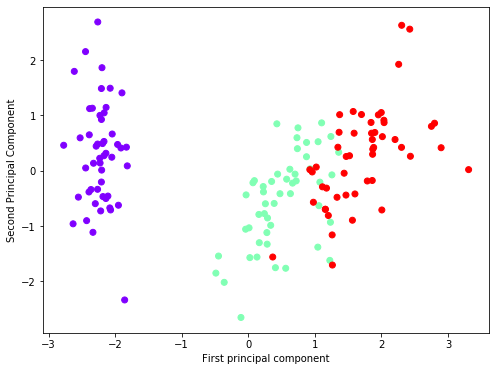

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=data.target,cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Now we have been able to view a 4 dimensional problem in 2 without any real loss of information. 
The next 2 code snipet show us the contribution of each feature in the new components and the % of variation explained by each component. We can see that component 0 explains 72.96% and component 1 explains 22.85%, totalling to 95.81%. We can see for example petal length has a very low contribution to component 1 and is far more important in component 0. Have a look for yourself.

In [15]:
print("explained variance %",pca.explained_variance_ratio_*100)
print(pca.components_)

explained variance % [72.96244541 22.85076179]
[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]


In [16]:
print(data.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


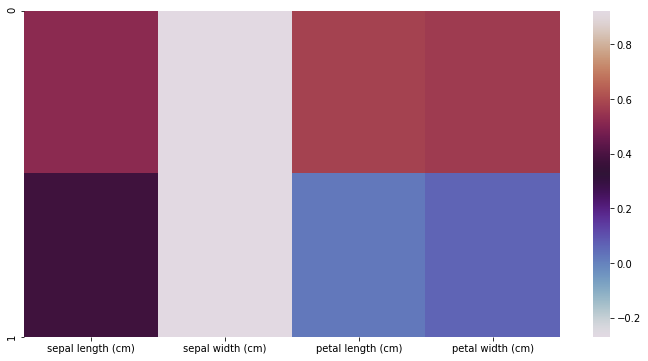

In [17]:
map= pd.DataFrame(pca.components_,columns=data.feature_names)
plt.figure(figsize=(12,6))
sns.heatmap(map,cmap='twilight')

I would now like you to repeat this analysis on the "load_breast_cancer" data from sklearn. What happens when you increase the number of components?

Let us know in the comments section on Futurelearn [here]( https://www.futurelearn.com/courses/pre-processing-data-and-feature-impact-calculation/1/steps/688506).